## Find and examine popular beer attributes

In [1]:
#import pandas
import pandas as pd

#create df from reviews
df_reviews = pd.read_csv('reviews.csv')

In [2]:
#check the number of rows
df_reviews.shape[0]

9073128

In [3]:
#check for number of unique beers
len(df_reviews.beer_id.unique())

309542

In [4]:
#create df from combined beers.csv and breweries.csv file
df_bb = pd.read_csv('beers_breweries.csv')

#check the number of rows
df_bb.shape[0]

265595

In [5]:
#merge beers/breweries with review
df_all = df_bb.merge(df_reviews, on='beer_id')

#check the number or rows in df_all
df_all.shape[0]

7524410

In [6]:
#find most popular beer style (based on total number of reviews)
df_all['style'].value_counts()[:5]

American IPA               1014713
American Imperial IPA       741723
American Imperial Stout     534725
American Pale Ale (APA)     394970
Belgian Saison              284756
Name: style, dtype: int64

### Most popular beer style is American IPA <br>


In [7]:
#create dataframe with just the American IPA rows
df_ipa = df_all[df_all['style'] == 'American IPA']

#verify the number of rows (should equal IPA number from value_counts above)
df_ipa.shape[0]

1014713

In [8]:
#verify the columns in the dataframe
df_ipa.columns

Index(['beer_id', 'beer', 'style', 'availability', 'abv', 'beer_notes',
       'retired', 'brewery', 'city', 'state', 'country', 'types', 'is_brewery',
       'is_bar', 'is_eatery', 'is_btg', 'is_homebrew', 'username', 'date',
       'text', 'look', 'smell', 'taste', 'feel', 'overall', 'score'],
      dtype='object')

In [9]:
#examine summary statistics
stats = df_ipa.describe()
stats

,beer_id,abv,look,smell,taste,feel,overall,score
count,1.014713e+06,1.000434e+06,617138.000000,617138.000000,617138.000000,617138.000000,617138.000000,1.014713e+06
mean,9.742292e+04,6.624243e+00,3.987836,3.946668,3.960967,3.927999,3.957421,3.948922e+00
std,8.919683e+04,7.862711e-01,0.444207,0.498232,0.517821,0.477756,0.488320,4.927037e-01
min,3.000000e+00,2.500000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
25%,2.946600e+04,6.200000e+00,3.750000,3.750000,3.750000,3.750000,3.750000,3.740000e+00
50%,7.312000e+04,6.800000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000e+00
75%,1.387350e+05,7.100000e+00,4.250000,4.250000,4.250000,4.250000,4.250000,4.250000e+00
max,3.731080e+05,1.600000e+01,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00


In [10]:
#compare statistics with all other beers
stats_diff = stats - df_all[df_all['style'] != 'American IPA'].describe()
stats_diff

,beer_id,abv,look,smell,taste,feel,overall,score
count,-5.494984e+06,-5.362888e+06,-3.111683e+06,-3.111683e+06,-3.111683e+06,-3.111683e+06,-3.111683e+06,-5.494984e+06
mean,1.601869e+04,-9.903882e-01,1.118667e-02,2.694129e-02,1.058228e-02,1.470209e-02,1.471450e-02,3.711763e-02
std,1.147702e+04,-1.821669e+00,-9.896083e-02,-1.013799e-01,-1.062048e-01,-1.134232e-01,-1.073346e-01,-1.147768e-01
min,-1.000000e+00,2.450000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.902000e+03,7.000000e-01,0.000000e+00,2.500000e-01,2.500000e-01,2.500000e-01,0.000000e+00,1.300000e-01
50%,1.014800e+04,-3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.675000e+04,-2.100000e+00,0.000000e+00,0.000000e+00,-2.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00
max,-1.500000e+01,-8.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [11]:
#show mean differences
stats_diff.drop('beer_id', axis=1).loc['mean']

abv       -0.990388
look       0.011187
smell      0.026941
taste      0.010582
feel       0.014702
overall    0.014715
score      0.037118
Name: mean, dtype: float64

### American IPA have slightly higher mean score across all categories <br>

In [12]:
#find top 5 availability results for IPA beers
df_ipa.availability.value_counts()[:5]

Year-round               549515
Rotating                 289349
Limited (brewed once)     93688
Fall                      29024
Winter                    21753
Name: availability, dtype: int64

In [13]:
#percent that are available Year-round
df_ipa.availability.value_counts()[0]/df_ipa.availability.value_counts().sum()*100

54.15472158137325

### 54.2% of American IPA are availble Year-round <br>

In [14]:
#find top 5 states for IPA beers
df_ipa.state.value_counts()[:5]

CA    249105
MI     64264
NY     62618
CO     55224
PA     55114
Name: state, dtype: int64

In [15]:
#check sum of top 5 states and total number of state and percentage of top 5
print(df_ipa.state.value_counts()[:5].sum())
print(df_ipa.state.value_counts().sum())
print(df_ipa.state.value_counts()[:5]/df_ipa.state.value_counts().sum()*100)

486325
1011045
CA    24.638369
MI     6.356196
NY     6.193394
CO     5.462071
PA     5.451192
Name: state, dtype: float64


In [16]:
#percent from CA
df_ipa.state.value_counts()[0]/df_ipa.state.value_counts().sum()*100

24.638369212052876

### Top five states for American IPA are CA, MI, NY, CO, and PA, with 24.6% from CA<br>

In [17]:
#find top words used in beer_note descriptions
#first confirm total number of unique IPAs
len(df_ipa.beer_id.unique())

32894

In [18]:
#check to see how many have beer_notes
len(df_ipa[df_ipa.beer_notes != 'No notes at this time.'].beer_id.unique())

5201

In [19]:
#create a df with each beer that has a note
df_ipa_notes = df_ipa[df_ipa.beer_notes != 'No notes at this time.'][['beer_id','beer_notes']].drop_duplicates()
df_ipa_notes.head()

,beer_id,beer_notes
72,262748,"""...you close your eyes and picture a Christma..."
103,253290,"Crashed hard, but lands soft, Fizzmeow brings ..."
448,279852,Local boys Ben and Ryan brought together their...
452,268537,Unfiltered and straw colored in appearance thi...
493,298628,Imagine a honey dew mellow driving a Mac truck...


In [20]:
#create code to find word count frequencies using nlkt library
import nltk

#make beer notes lower case, remove . and , then combine into one string
txt = df_ipa_notes.beer_notes.str.lower().str.replace(r',', '', regex=True) \
    .str.replace(r'.', '', regex=True).str.cat(sep=' ')
#tokenize words into a list
words = nltk.tokenize.word_tokenize(txt)
#find the frequency of each word
word_dist = nltk.FreqDist(words)
word_dist

FreqDist({'and': 8133, 'the': 5661, 'with': 5632, 'a': 5551, 'of': 5072, 'ipa': 3894, 'hops': 2579, 'to': 2469, 'is': 2380, 'this': 2258, ...})

In [21]:
#remove stopwords like and, the, a, etc. then show 15 most common
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
words_except_stop_dist.most_common(15)

[('ipa', 3894),
 ('hops', 2579),
 ('hop', 1993),
 ('brewed', 1519),
 ('beer', 1318),
 ('hopped', 1112),
 ('citra', 1013),
 ('malt', 872),
 ('dry', 808),
 ('mosaic', 794),
 ('citrus', 786),
 ('’', 773),
 ('!', 770),
 ('ale', 740),
 ('simcoe', 664)]

In [22]:
#find words with frequncy over 600
filter_words = dict([(m, n) for m, n in words_except_stop_dist.items() if n > 600])
#remove additonal ' and ! characters
filter_words.pop('’')
filter_words.pop('!')
filter_words

{'ipa': 3894,
 'hops': 2579,
 'citra': 1013,
 'mosaic': 794,
 'malt': 872,
 'beer': 1318,
 'flavor': 608,
 'aroma': 631,
 'brewed': 1519,
 'citrus': 786,
 'hop': 1993,
 'simcoe': 664,
 'dry': 808,
 'hopped': 1112,
 'ale': 740}

### Top five beer_notes words are: ipa, hops, hop, brewed, and beer <br>

In [23]:
#import libraries for plotting
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt 

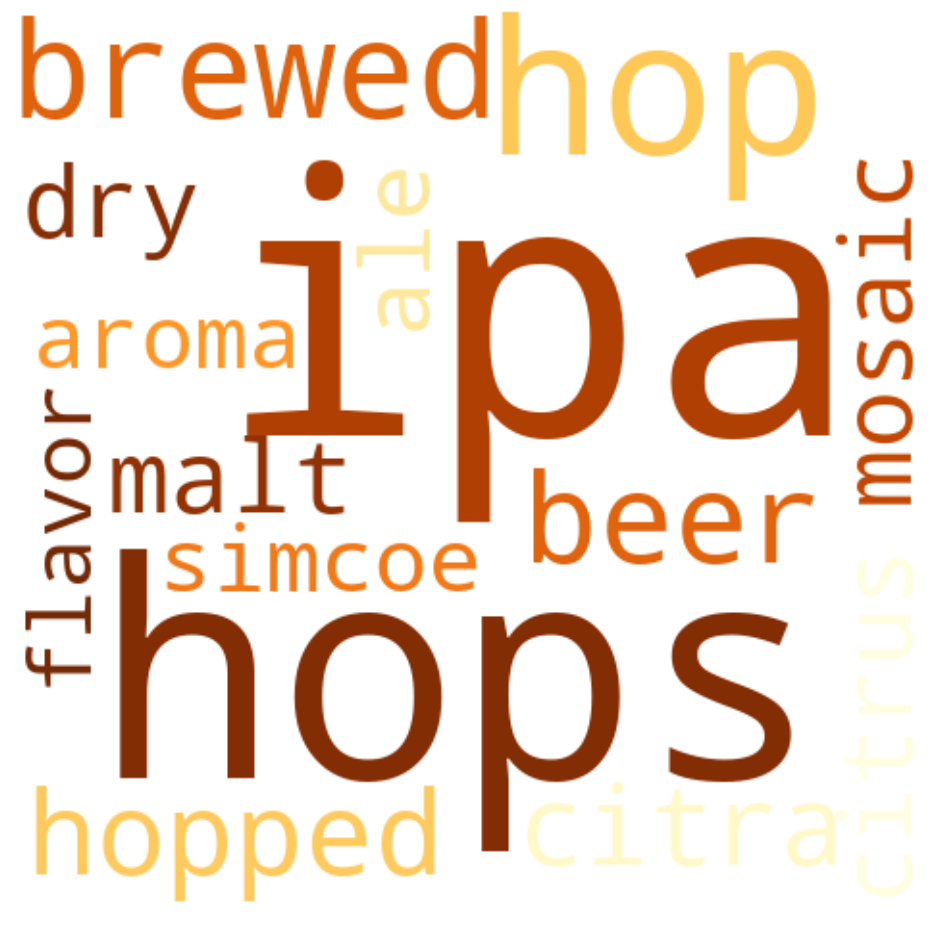

In [24]:
#create word cloud
wcloud = WordCloud(width=480, height=480, background_color='white', 
                  colormap='YlOrBr').generate_from_frequencies(filter_words)
#set plot parameters
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()